# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)
train_data.head()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,2.979792,3.094627,3.205219,3.313738,3.339790,3.360325,3.378547,3.337554,3.291901,3.243637,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,13.4,0,1,0,0
p01_1,3.313825,3.339864,3.361240,3.380543,3.339790,3.293475,3.245003,3.170443,3.091433,3.010016,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,12.8,0,1,0,0
p01_2,3.380632,3.339864,3.294374,3.246934,3.172584,3.092925,3.011302,3.036755,3.058022,3.076765,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,15.5,0,1,0,0
p01_3,3.247019,3.172657,3.093776,3.013119,3.038818,3.059500,3.078074,3.059036,3.035748,3.010016,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,14.8,0,1,0,0
p01_4,3.013196,3.038892,3.060343,3.079923,3.061113,3.037216,3.011302,2.891926,2.768457,2.642898,...,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,12.7,0,1,0,0


In [3]:
X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

### Define a tuning function

In [4]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune XGBoost

In [ ]:
from src.features.tuners import XGBHyperparameterTuner

tune(XGBHyperparameterTuner(), X, y)

### Tune linear regression models 

In [ ]:
from src.features.tuners import LassoLarsICHyperparameterTuner

tune(LassoLarsICHyperparameterTuner(), X, y)

In [ ]:
from src.features.tuners import LassoCVHyperparameterTuner

tune(LassoCVHyperparameterTuner(), X, y)

-----------RidgeCV-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('cv', 6),
             ('fit_intercept', True),
             ('gcv_mode', 'svd'),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 2.0970145799825923


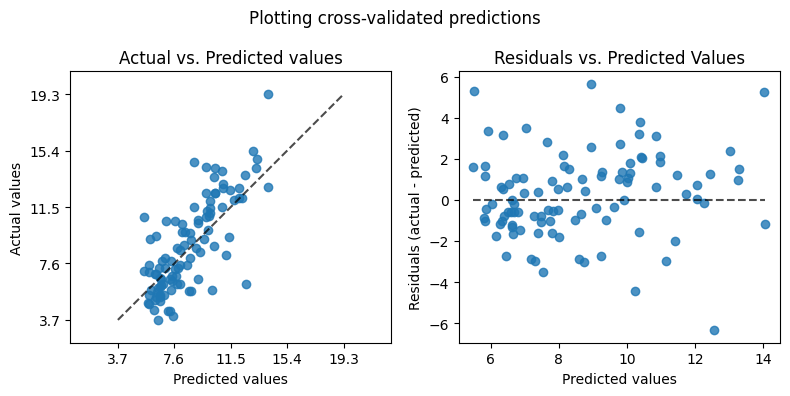

In [5]:
from src.features.tuners import RidgeCVHyperparameterTuner

tune(RidgeCVHyperparameterTuner(), X, y)